In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
# loading the dataset
df = pd.read_csv('../datasets/thyroid.csv')

In [3]:
# first 5 rows
df.head()

# Age is in years/100
# Sex: 0:Female, 1:Male 
# Age, TSH, T3, TT4, T4U, FTI are continuous variables
# rest are categorical variables

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid surgery,I131_treatment,Query_hypothyroid,...,Goiter,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
1,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
2,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
3,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3
4,0.69,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.016,0.086,0.070,0.123,3


In [4]:
# describing the structure of the dataset
df.describe()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid surgery,I131_treatment,Query_hypothyroid,...,Goiter,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
count,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,...,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000
mean,0.520521,0.304390,0.130453,0.015421,0.012781,0.038344,0.010836,0.014032,0.016671,0.065574,...,0.008197,0.025563,0.000139,0.048902,0.004862,0.019976,0.109428,0.097836,0.113214,2.902890
std,0.189260,0.460181,0.336824,0.123228,0.112338,0.192039,0.103539,0.117630,0.128045,0.247553,...,0.090170,0.157837,0.011787,0.215679,0.022982,0.007539,0.035973,0.019082,0.036099,0.365817
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002000,0.017000,0.002000,1.000000
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000710,0.017000,0.089000,0.087000,0.095000,3.000000
50%,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001700,0.020100,0.107000,0.097000,0.111000,3.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002700,0.022000,0.125000,0.104000,0.127000,3.000000
max,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.530000,0.180000,0.600000,0.233000,0.642000,3.000000


In [5]:
# there are no null values in oud dataset
df.isna().sum()

Age                          0
Sex                          0
On_thyroxine                 0
Query_on_thyroxine           0
On_antithyroid_medication    0
Sick                         0
Pregnant                     0
Thyroid surgery              0
I131_treatment               0
Query_hypothyroid            0
Query_hyperthyroid           0
Lithium                      0
Goiter                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

In [6]:
# 3 - Hyperhyroidism
# 2 - Hypothyroidism
# 1 - Normal
df.Class.value_counts()

3    6665
2     367
1     166
Name: Class, dtype: int64

In [7]:
# splitting the data into test and train sets
X = df.drop('Class', axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=143)

In [8]:
# trying the Logistic Regression Model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_test, y_test)

LogisticRegression(max_iter=1000)

In [9]:
# Accuracy achieved = 92%
model_lr.score(X_test, y_test)

0.9259259259259259

In [10]:
# trying the Random Forest Classifier Model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Accuracy achieved = 99%
model_rf.score(X_test, y_test)

0.9962962962962963

In [12]:
predictions = model_rf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

Text(33.0, 0.5, 'Truth')

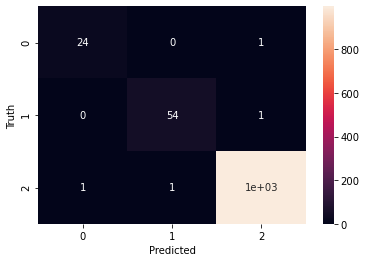

In [14]:
# printing the confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, )
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        25
           2       0.98      0.98      0.98        55
           3       1.00      1.00      1.00      1000

    accuracy                           1.00      1080
   macro avg       0.98      0.98      0.98      1080
weighted avg       1.00      1.00      1.00      1080



In [16]:
# saving the trained model for later use
pickle.dump(model_rf,open('../Saved Models/thyroid.pickle','wb'))